## Homework 03: due 2022/04/20 23:59(100%)

### - Tutorial : 
___1. scipy.signal.convolve2d:___ https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html

___2. OpenCV2 Convolution:___ https://blog.csdn.net/hysterisis/article/details/113097507

___3. cv2.filter2D:___ https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04 
                   
### - After you go through the tutorials, you should be able to work on this assignment.

### - Please answer the following questions and work directly on this jupyter notebook.

### - Make sure the code can be run and show the result and figures properly.

### - Please write down your observation with markdown in this notebook briefly.

In [1]:
import cv2
import os
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

#### 1. Please use the defined input matrix and the kernel below, and use the ___scipy.signal.convolve2d___ and ___cv2.filter2D___ to implement the convolution operation. The result output after convolution is given for your reference. (With half zero padding to make the shape fixed) (50%)

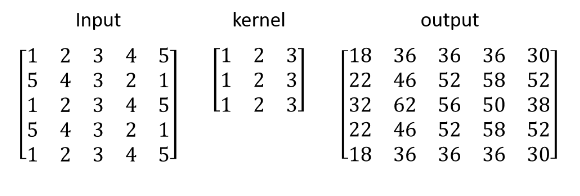

In [2]:
# Do not change this block
kernel = np.array([[1,2,3],
                  [1,2,3],
                  [1,2,3]])

input = np.zeros((5, 5))
for i in range(5):
    for j in range(5):
        if i%2 == 0:
            input[i][j] = j+1
        else:
            input[i][j] = 5-j

In [3]:
# Scipy signal
sci_out = signal.convolve2d(input, kernel, mode='same')
print(sci_out)

# Open CV
cv_out = cv2.filter2D(input, -1, cv2.flip(kernel,-1), borderType=cv2.BORDER_CONSTANT)
print(cv_out)

[[18. 36. 36. 36. 30.]
 [22. 46. 52. 58. 52.]
 [32. 62. 56. 50. 38.]
 [22. 46. 52. 58. 52.]
 [18. 36. 36. 36. 30.]]
[[18. 36. 36. 36. 30.]
 [22. 46. 52. 58. 52.]
 [32. 62. 56. 50. 38.]
 [22. 46. 52. 58. 52.]
 [18. 36. 36. 36. 30.]]


#####  The comparison between scipy & cv2
> For scipy it needs three parameters to get the answer, input the original(the 2d array)/kernel(go over through the input)/mode(choose the 'same' that have the identical size with input).

> For cv2 it needs to flip the kernel, so we use cv2.flip and also set the depth of output(-1), the last thing is for selecting the bordertype as constant to let the pixel value as 0.  

#### 2. Please do the convolution operation on your own image or on the give __test.jpg__. Using all the kernels below, and save each filtered image in ___.png___ file with the corresponding kernel names. Also, move all the filtered images to a folder. (50%)

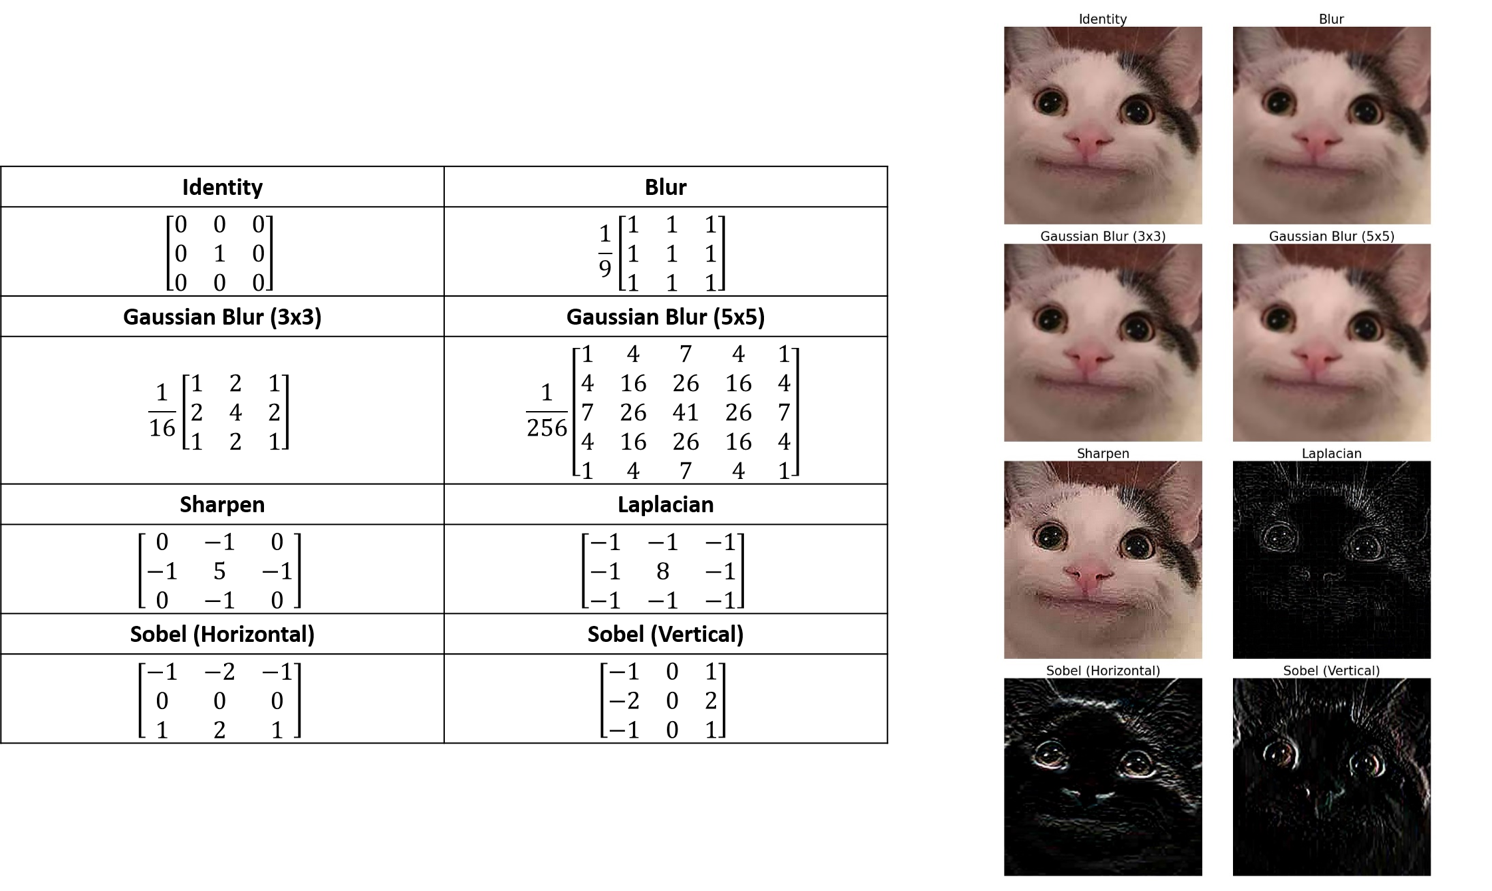

In [4]:
# define the 3d kernels 
Identity = np.array(([0,0,0],
                     [0,1,0],
                     [0,0,0]))

#blur = np.array([np.ones((3,3))*1/9])
Blur = np.ones((3,3))*1/9

Gaussian_blur_3 = 1/16*np.array(([1,2,1],
                              [2,4,2],
                              [1,2,1]))

Gaussian_blur_5 = 1/256*np.array(([1,4,7,4,1],
                                 [4,16,26,16,4],
                                 [7,26,41,26,7],
                                 [4,16,26,16,4],
                                 [1,4,7,4,1]))

Sharpen = np.array(([0,-1,0],
                   [-1,5,-1],
                   [0,-1,0]))

Laplacian = np.array(([-1,-1,-1],
                     [-1,8,-1],
                     [-1,-1,-1]),dtype='int')

Sobel_Horizontal = np.array(([-1,-2,-1],
                   [0,0,0],
                   [1,2,1]),dtype='int')

Sobel_Vertical = Sobel_Horizontal.T

(225, 225, 3)


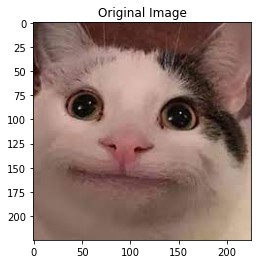

In [5]:
# read image
img = cv2.imread('test.jpg')

#turn the bgr format to rgb format
img = img[:,:,::-1]
plt.imshow(img)
print(img.shape) # 3d for rgb
plt.title("Original Image");

In [6]:
#the path that save the images
path = "C:/Users/Winnie/Desktop/graduate2/Deep_Learning_in_Computer_Vision/homework/HW3/images"

# create a kernel function
def kernel(name):
    # read image
    img = cv2.imread('test.jpg')
    #turn the bgr format to rgb format
    img = img[:,:,::-1]
    
    for i in range(3):
        img[:,:,i] = signal.convolve2d(img[:,:,i], name, mode='same')
        filtered = img.astype('uint8')
        #print(filtered) # to check the pixel value
        plt.imshow(filtered)

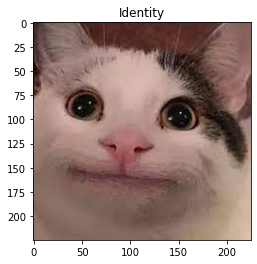

In [7]:
kernel(Identity)
plt.title("Identity");
fullpath = os.path.join(path, 'Identity.png')
plt.savefig(fullpath)

#### Identity
> Identity filter will remain the same as an original one.

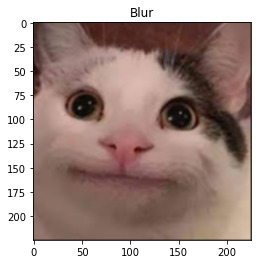

In [8]:
kernel(Blur)
plt.title("Blur");
fullpath = os.path.join(path, 'Blur.png')
plt.savefig(fullpath)

#### Blur
> Blur filter will let the image texture looks soft and can remove some noises in the image.

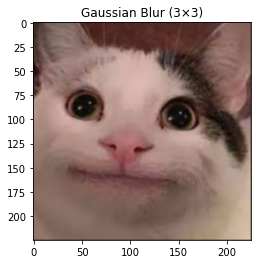

In [9]:
kernel(Gaussian_blur_3)
plt.title("Gaussian Blur (3×3)");
fullpath = os.path.join(path, 'Gaussian Blur (3×3).png')
plt.savefig(fullpath)

#### Gaussian Blur (3×3)
> Gaussian Blur (3×3) filter has the same function with blur filter, but the filter itself can change the size to determine how much blur we need to remove the noise.

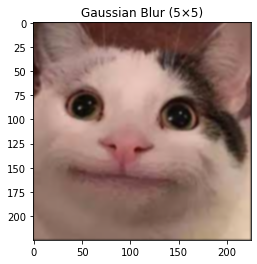

In [10]:
kernel(Gaussian_blur_5)
plt.title("Gaussian Blur (5×5)");
fullpath = os.path.join(path, 'Gaussian Blur (5×5).png')
plt.savefig(fullpath)

#### Gaussian Blur (5×5)
> Gaussian Blur (5×5) filter compares with (3×3), we can know if the size becomes bigger, the image will looks more obscure.

In [11]:
# create a kernel function
def kernel(name):
    # read image
    img = cv2.imread('test.jpg')
    img = img[:,:,::-1]
    cv_out = cv2.filter2D(img, -1, cv2.flip(name,-1), borderType=cv2.BORDER_CONSTANT)
    #print(cv_out)
    plt.imshow(cv_out)

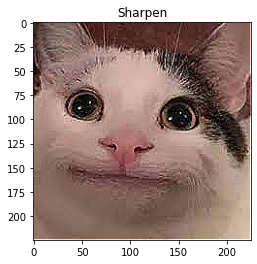

In [12]:
kernel(Sharpen)
plt.title("Sharpen");
fullpath = os.path.join(path, 'Sharpen.png')
plt.savefig(fullpath)

#### Sharpen
> Sharpen filter will turn the original image into more sharper ones .

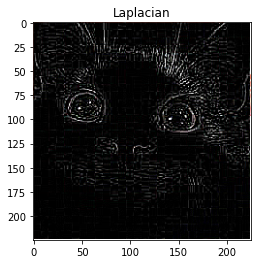

In [13]:
kernel(Laplacian)
plt.title("Laplacian");
fullpath = os.path.join(path, 'Laplacian.png')
plt.savefig(fullpath)

#### Laplacian
> Laplacian filter will highlight the image that the original textures have already obvious.

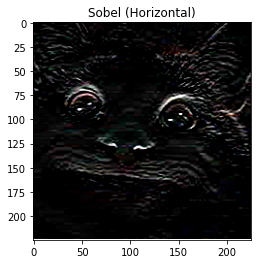

In [14]:
kernel(Sobel_Horizontal)
plt.title("Sobel (Horizontal)");
fullpath = os.path.join(path, 'Sobel_Horizontal.png')
plt.savefig(fullpath)

#### sobel horizontal
> Horizontal direction of the image looks brigher than the vertical, so the filter will highlight the horizontal shapes.

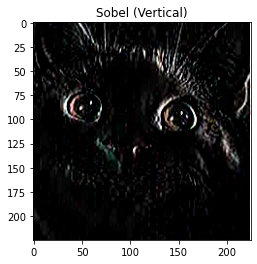

In [15]:
kernel(Sobel_Vertical)
plt.title("Sobel (Vertical)");
fullpath = os.path.join(path, 'Sobel_Vertical.png')
plt.savefig(fullpath)

#### sobel vertical
> Vertical direction of the image looks brigher than the horizontal, so the filter will highlight the vertical shapes.